## 📂 Preprocesamiento de Datos

Carga, limpieza y transformación de los datos de las campañas de márketing para su análisis.

In [815]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
from difflib import get_close_matches
import os

Carga de los datos

In [816]:
df = pd.read_csv("../data/marketingcampaigns.csv", on_bad_lines='skip')

Visualización y primer análisis de los datos

In [817]:
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [818]:
df.tail(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.3,social media,B2B,organic,0.5,NaN
1028,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.0
1029,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.2,50000.0
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.6,webinar,B2B,paid,0.7,90000.0
1031,Too many conversions,2023-05-01,2023-11-01,40000,0.8,social media,B2C,organic,1.5,120000.0


In [819]:
df.shape

(1032, 10)

In [820]:
df.columns

Index(['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type',
       'target_audience', 'channel', 'conversion_rate', 'revenue'],
      dtype='object')

In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1032 non-null   object 
 1   start_date       1031 non-null   object 
 2   end_date         1030 non-null   object 
 3   budget           1029 non-null   object 
 4   roi              1028 non-null   float64
 5   type             1031 non-null   object 
 6   target_audience  1030 non-null   object 
 7   channel          1031 non-null   object 
 8   conversion_rate  1028 non-null   float64
 9   revenue          1029 non-null   float64
dtypes: float64(3), object(7)
memory usage: 80.8+ KB


In [822]:
df.describe()

,roi,conversion_rate,revenue
count,1028.000000,1028.000000,1029.000000
mean,0.533804,0.541936,511591.195277
std,0.261869,0.267353,287292.729847
min,-0.200000,0.000000,108.210000
25%,0.310000,0.300000,267820.250000
50%,0.530000,0.550000,518001.770000
75%,0.760000,0.770000,765775.140000
max,0.990000,1.500000,999712.490000


In [823]:
df.describe(include='all')

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
count,1032,1031,1030,1029,1028.000000,1031,1030,1031,1028.000000,1029.000000
unique,1014,347,347,1011,NaN,6,3,4,NaN,NaN
top,User-friendly client-driven service-desk,2023-04-01,2023-10-09,8082.3,NaN,email,B2B,promotion,NaN,NaN
freq,3,9,9,4,NaN,288,529,280,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.533804,NaN,NaN,NaN,0.541936,511591.195277
std,NaN,NaN,NaN,NaN,0.261869,NaN,NaN,NaN,0.267353,287292.729847
min,NaN,NaN,NaN,NaN,-0.200000,NaN,NaN,NaN,0.000000,108.210000
25%,NaN,NaN,NaN,NaN,0.310000,NaN,NaN,NaN,0.300000,267820.250000
50%,NaN,NaN,NaN,NaN,0.530000,NaN,NaN,NaN,0.550000,518001.770000
75%,NaN,NaN,NaN,NaN,0.760000,NaN,NaN,NaN,0.770000,765775.140000


In [824]:
print(df.dtypes)

campaign_name       object
start_date          object
end_date            object
budget              object
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object


Análisis de los datos nulos

In [825]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

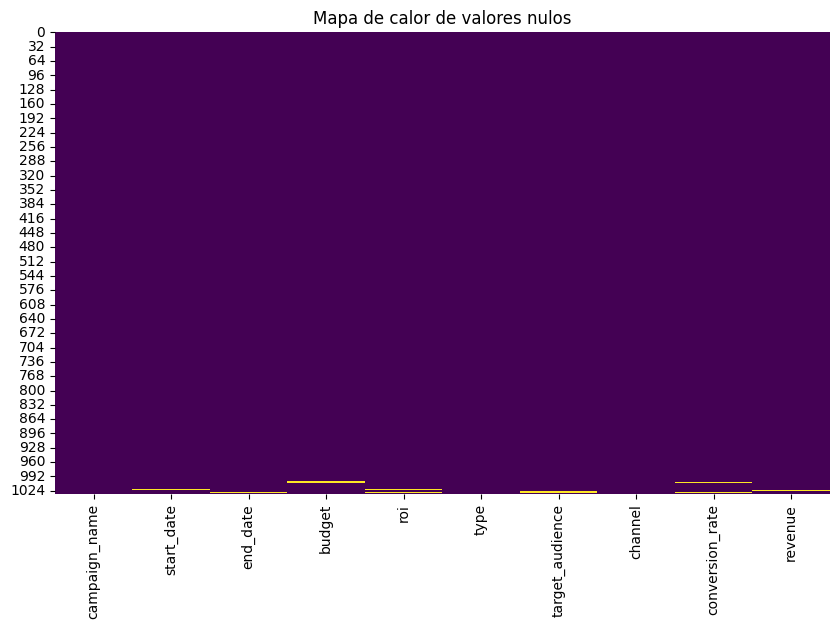

In [826]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores nulos")
plt.show()

*Se detectan cambios necesarios en el tipo de datos por columnas como las relativas a las fechas que están configuradas como objetos, al igual que el budget.*

Convertir las fechas, sin formato estricto

In [827]:

df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

In [828]:
print(df.dtypes)

campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                     object
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object


In [829]:
mean_start_date = df['start_date'].mean()
mean_start_date

Timestamp('2023-01-30 14:19:14.518950144')

In [830]:
mean_end_date = df['end_date'].mean()
mean_end_date

Timestamp('2024-01-30 01:05:46.355685120')

In [831]:
average_campaign_duration = (mean_end_date - mean_start_date).days
average_campaign_duration

364

Rellenar start_date nulo con end_date - 364 días

In [832]:
df.loc[df['start_date'].isna(), 'start_date'] = df['end_date'] - pd.Timedelta(days=180)

In [833]:
df[df['roi'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1021,Cloud-based scalable solution,2023-07-04,2023-12-31,50000,NaN,event,B2C,paid,0.3,120000.0
1024,Null-heavy campaign,2023-01-01,NaT,NaN,NaN,B2B,social media,NaN,NaN,NaN
1028,Random mess,2023-06-06,NaT,100000,NaN,podcast,NaN,referral,NaN,300000.0
1029,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.2,50000.0


In [834]:
df['type'].fillna('Not available', inplace=True)
df['start_date'].fillna(df['end_date'] - pd.Timedelta(days=364), inplace=True)
df['end_date'].fillna(df['start_date'] + pd.Timedelta(days=364), inplace=True)
df['target_audience'].fillna('Not available', inplace=True)
df['conversion_rate'].fillna(0, inplace=True)
df['revenue'].fillna(0, inplace=True)
df['budget'].fillna(0, inplace=True)

In [835]:
df[df['channel'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1024,Null-heavy campaign,2023-01-01,2023-12-31,0,NaN,B2B,social media,NaN,0.0,0.0


Eliminamos el único nulo de la columna 'channel' ya que no hay ni end_date (lo hemos calculado nosotros), ni budget, ni roi, ni conversion_rate, ni revenue asociados a la campaña.

In [836]:
df = df.dropna(subset=['channel'])

In [837]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           1
budget             0
roi                3
type               0
target_audience    0
channel            0
conversion_rate    0
revenue            0
dtype: int64

Identificamos los nulos restantes relativos a la 'start_date' y al 'end_date'. Coinciden en la misma línea con lo que no podemos elegir uno de ellos como referencia para calcular el otro. Calculamos la fecha media para cada uno de ellos y la asignamos a los valores nulos

In [838]:
df[df['start_date'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1006,Typo in Date,NaT,NaT,50000.0,0.65,webinar,B2C,promotion,0.9,320000.0


In [839]:
df['start_date'].fillna(df['start_date'].mean(), inplace=True)
df['end_date'].fillna(df['end_date'].mean(), inplace=True)

In [840]:
df[df['start_date'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue


Verificamos que no haya más nulos o valores restantes

In [841]:
df.isnull().sum()/ len(df) * 100

campaign_name      0.00000
start_date         0.00000
end_date           0.00000
budget             0.00000
roi                0.29098
type               0.00000
target_audience    0.00000
channel            0.00000
conversion_rate    0.00000
revenue            0.00000
dtype: float64

*Para reemplazar los valores nulos de ROI esperaremos a dar el formato correcto a 'budget' y a 'revenue' para poder calcular los valores restantes de ROI*

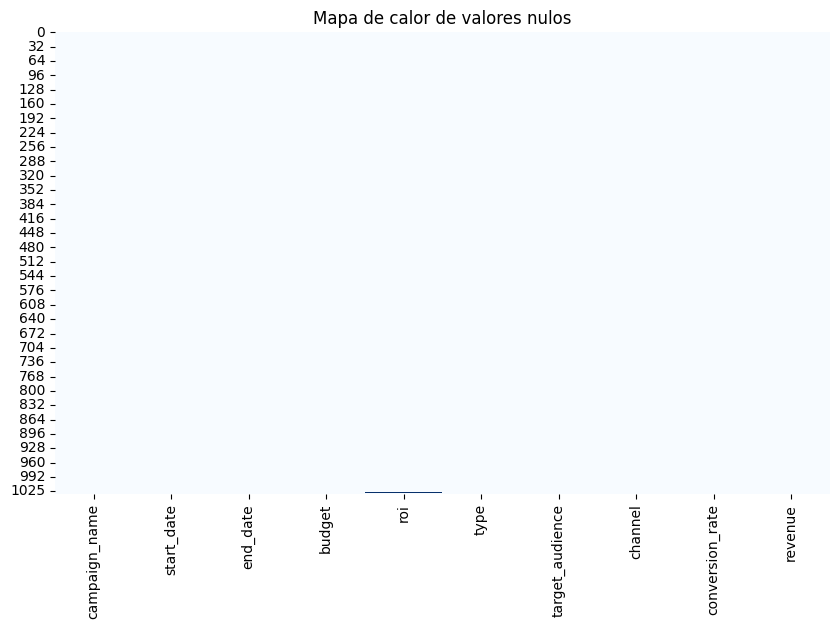

In [842]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title("Mapa de calor de valores nulos")
plt.xticks(rotation=90)
plt.show()

In [843]:
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


Añadimos la columna 'campaign_duration' para saber cuántos días ha durado cada campaña

In [844]:
# 2. Calcular la duración en días solo para filas válidas
df['campaign_duration'] = (df['end_date'] - df['start_date']).dt.days

In [845]:
# 3. Calcular la media de duración excluyendo NaN
mean_duration = df['campaign_duration'].mean()

# 4. Rellenar start_date donde falte, usando end_date - media duración
mask_missing_start = df['start_date'].isna() & df['end_date'].notna()
df.loc[mask_missing_start, 'start_date'] = df.loc[mask_missing_start, 'end_date'] - pd.to_timedelta(mean_duration, unit='d')



Asignamos el tipo de dato correcto a cada columna incorrecta

In [846]:
str_values_in_budget = df[df['budget'].apply(lambda x: isinstance(x, str))]
print(str_values_in_budget['budget'])

0         8082.3
1       17712.98
2        84643.1
3       14589.75
4        39291.9
          ...   
1027       20000
1028      100000
1029         abc
1030       60000
1031       40000
Name: budget, Length: 1029, dtype: object


In [847]:
valor_nulo = df[df['budget'] == 'abc']
print(valor_nulo)

       campaign_name start_date   end_date budget  roi   type target_audience  \
1029  Invalid budget 2022-12-01 2023-06-01    abc  NaN  email             B2C   

        channel  conversion_rate  revenue  campaign_duration  
1029  promotion              0.2  50000.0                182  


In [848]:
df['budget'] = df['budget'].replace('abc', '0')
df['budget'] = df['budget'].astype(float)

Calculamos los valores faltantes de la columna ROI, los asignamos y verificamos que no haya más valores faltantes

In [849]:
roi = df['revenue'] / df['budget']
df['roi'].fillna(roi, inplace=True)

In [850]:
df[df['roi'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration


Sustitución del valor 'inf' por '0' al tratarse de una división por 0

In [851]:
print(df['roi'].unique())

[ 0.35  0.74  0.37  0.47  0.3   0.59  0.4   0.16  0.81  0.58  0.94  0.92
  0.23  0.52  0.17  0.38  0.45  0.2   0.69  0.9   0.67  0.21  0.98  0.63
  0.61  0.44  0.53  0.7   0.34  0.6   0.91  0.95  0.55  0.84  0.51  0.5
  0.99  0.39  0.87  0.96  0.64  0.93  0.56  0.26  0.49  0.28  0.72  0.8
  0.13  0.32  0.79  0.82  0.83  0.88  0.76  0.65  0.86  0.73  0.12  0.85
  0.    0.77  0.97  0.54  0.78  0.89  0.14  0.19  0.62  0.18  0.1   0.29
  0.68  0.31  0.75  0.36  0.11  0.15  0.22  0.33  0.48  0.41  0.71  0.27
  0.46  0.24  0.25  0.66  0.57  0.43  0.42  2.4  -0.2   3.     inf]


In [852]:
valor_inf = df[df['roi'] == np.inf]
print(valor_inf)

       campaign_name start_date   end_date  budget  roi   type  \
1029  Invalid budget 2022-12-01 2023-06-01     0.0  inf  email   

     target_audience    channel  conversion_rate  revenue  campaign_duration  
1029             B2C  promotion              0.2  50000.0                182  


In [853]:
valor_tres = df[df['roi'] == 3]
print(valor_tres)

     campaign_name start_date   end_date    budget  roi     type  \
1028   Random mess 2023-06-06 2024-06-04  100000.0  3.0  podcast   

     target_audience   channel  conversion_rate   revenue  campaign_duration  
1028   Not available  referral              0.0  300000.0                364  


In [854]:
df['roi'] = df['roi'].replace([float('inf'), -float('inf')], 0)

In [855]:
print(df['roi'].unique())

[ 0.35  0.74  0.37  0.47  0.3   0.59  0.4   0.16  0.81  0.58  0.94  0.92
  0.23  0.52  0.17  0.38  0.45  0.2   0.69  0.9   0.67  0.21  0.98  0.63
  0.61  0.44  0.53  0.7   0.34  0.6   0.91  0.95  0.55  0.84  0.51  0.5
  0.99  0.39  0.87  0.96  0.64  0.93  0.56  0.26  0.49  0.28  0.72  0.8
  0.13  0.32  0.79  0.82  0.83  0.88  0.76  0.65  0.86  0.73  0.12  0.85
  0.    0.77  0.97  0.54  0.78  0.89  0.14  0.19  0.62  0.18  0.1   0.29
  0.68  0.31  0.75  0.36  0.11  0.15  0.22  0.33  0.48  0.41  0.71  0.27
  0.46  0.24  0.25  0.66  0.57  0.43  0.42  2.4  -0.2   3.  ]


In [856]:
df['campaign_duration'] = df['campaign_duration'].astype(float)

In [857]:
print(df.dtypes)

campaign_name                object
start_date           datetime64[ns]
end_date             datetime64[ns]
budget                      float64
roi                         float64
type                         object
target_audience              object
channel                      object
conversion_rate             float64
revenue                     float64
campaign_duration           float64
dtype: object


In [858]:
df['campaign_duration'] = (df['end_date'] - df['start_date']).dt.days

average_campaign_duration = df['campaign_duration'].mean()
print(f"Average Campaign Duration: {average_campaign_duration:.2f} days")

Average Campaign Duration: 364.24 days


Identificación y eliminación de los datos duplicados

In [859]:
initial_rows = len(df)
initial_rows

1031

In [860]:
df.duplicated().sum()

np.int64(15)

In [861]:
df[df.duplicated()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration
1000,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,328
1001,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,295
1002,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,366
1009,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,328
1010,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,432
1011,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,295
1012,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,366
1013,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,313
1014,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,75569.28,0.59,social media,B2C,referral,0.67,558302.11,167
1015,Innovative context-sensitive framework,2023-03-01,2024-02-23,28964.45,0.59,email,B2C,referral,0.17,172882.59,359


In [862]:
df = df.drop_duplicates()

In [863]:
df.duplicated().sum()

np.int64(0)

Identificar duplicados parciales

In [864]:
partial_duplicates = df[df.duplicated(subset='campaign_name', keep=False)].sort_values(by='campaign_name', ascending=True)
partial_duplicates

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration
203,Reverse-engineered static infrastructure,2023-07-26,2024-05-29,12246.32,0.48,email,B2B,referral,0.44,987205.29,308
985,Reverse-engineered static infrastructure,2023-07-16,2023-08-07,7315.35,0.86,email,B2C,referral,0.70,162798.55,22
5,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,75569.28,0.59,social media,B2C,referral,0.67,558302.11,167
1003,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,0.00,0.59,social media,B2C,referral,0.67,558302.11,167
7,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.40,webinar,B2C,promotion,0.52,206241.46,339
1004,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.40,Not available,B2C,promotion,0.52,206241.46,339


In [865]:
valor_duplicado_uno = df[(df['campaign_name'] == 'Upgradable transitional data-warehouse') & (df['budget'] == 0)]
valor_duplicado_uno

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration
1003,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,0.0,0.59,social media,B2C,referral,0.67,558302.11,167


In [866]:
valor_duplicado_dos = df[(df['campaign_name'] == 'User-friendly client-driven service-desk') & (df['type'] == 'Not available')]
valor_duplicado_dos

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration
1004,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.4,Not available,B2C,promotion,0.52,206241.46,339


In [867]:
# Obtener los índices directamente de las condiciones
indices_a_eliminar = df[
    ((df['campaign_name'] == 'Upgradable transitional data-warehouse') & (df['budget'] == 0)) |
    ((df['campaign_name'] == 'User-friendly client-driven service-desk') & (df['type'] == 'Not available'))
].index

# Eliminar usando estos índices
df = df.drop(indices_a_eliminar)

In [868]:
# Verificar que no hemos perdido información valiosa
print("Rangos de valores después de eliminar duplicados:")
for col in ['budget', 'roi', 'revenue']:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, mean={df[col].mean():.2f}")

Rangos de valores después de eliminar duplicados:
budget: min=-10000.0, max=9999999.0, mean=59169.29
roi: min=-0.2, max=3.0, mean=0.54
revenue: min=0.0, max=999712.49, mean=512590.40


In [869]:
final_rows = len(df)
print(f"Filas eliminadas: {initial_rows - final_rows}")
print(f"Porcentaje de reducción: {(initial_rows - final_rows) / initial_rows * 100:.2f}%")

Filas eliminadas: 17
Porcentaje de reducción: 1.65%


Consistencia en los formatos de 'roi', 'conversion_rate', 'budget' y 'revenue'

In [870]:
df['roi'] = df['roi'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)
df['conversion_rate'] = df['conversion_rate'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)
df['revenue'] = df['revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)
df['budget'] = df['budget'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)

In [871]:
print(df['roi'].unique())

[ 0.35  0.74  0.37  0.47  0.3   0.59  0.4   0.16  0.81  0.58  0.94  0.92
  0.23  0.52  0.17  0.38  0.45  0.2   0.69  0.9   0.67  0.21  0.98  0.63
  0.61  0.44  0.53  0.7   0.34  0.6   0.91  0.95  0.55  0.84  0.51  0.5
  0.99  0.39  0.87  0.96  0.64  0.93  0.56  0.26  0.49  0.28  0.72  0.8
  0.13  0.32  0.79  0.82  0.83  0.88  0.76  0.65  0.86  0.73  0.12  0.85
  0.    0.77  0.97  0.54  0.78  0.89  0.14  0.19  0.62  0.18  0.1   0.29
  0.68  0.31  0.75  0.36  0.11  0.15  0.22  0.33  0.48  0.41  0.71  0.27
  0.46  0.24  0.25  0.66  0.57  0.43  0.42  2.4  -0.2   3.  ]


In [872]:
def verificar_rangos_coherentes(df):
    print("Verificando coherencia de rangos:")
    
    # Para cada columna numérica
    for col in df.select_dtypes(include=['float', 'int']).columns:
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        
        print(f"{col}: min={min_val}, max={max_val}, mean={mean_val}")
        
        # Añadir reglas de verificación específicas por columna
        if col == 'conversion_rate' and max_val > 1:
            print(f"  ⚠️ Advertencia: {col} tiene valores mayores a 1, podría no estar en formato decimal")
        
        if col == 'roi' and max_val > 1:
            print(f"  ⚠️ Advertencia: {col} tiene valores mayores a 1, podría no estar en formato decimal")

# Ejecutar verificación general
verificar_rangos_coherentes(df)

Verificando coherencia de rangos:
budget: min=-10000.0, max=9999999.0, mean=59169.29212031559
roi: min=-0.2, max=3.0, mean=0.538905325443787
  ⚠️ Advertencia: roi tiene valores mayores a 1, podría no estar en formato decimal
conversion_rate: min=0.0, max=1.5, mean=0.5416666666666666
  ⚠️ Advertencia: conversion_rate tiene valores mayores a 1, podría no estar en formato decimal
revenue: min=0.0, max=999712.49, mean=512590.4035502959
campaign_duration: min=-60, max=716, mean=364.87080867850096


# Manejo de valores atípicos

In [873]:
# --- Detectar y manejar outliers usando IQR ---
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# --- Detectar y manejar outliers usando Z-score ---
from scipy.stats import zscore

def detect_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    outliers = df[(z_scores < -threshold) | (z_scores > threshold)]
    return outliers

# --- Análisis de 'budget' ---
budget_outliers_iqr, budget_lower, budget_upper = detect_outliers_iqr(df, 'budget')
print(f"Outliers en 'budget' usando IQR: {len(budget_outliers_iqr)}")
print(f"Rango aceptable para 'budget': {budget_lower:.2f} - {budget_upper:.2f}")

budget_outliers_zscore = detect_outliers_zscore(df, 'budget')
print(f"Outliers en 'budget' usando Z-score: {len(budget_outliers_zscore)}")

# --- Análisis de 'revenue' ---
revenue_outliers_iqr, revenue_lower, revenue_upper = detect_outliers_iqr(df, 'revenue')
print(f"Outliers en 'revenue' usando IQR: {len(revenue_outliers_iqr)}")
print(f"Rango aceptable para 'revenue': {revenue_lower:.2f} - {revenue_upper:.2f}")

revenue_outliers_zscore = detect_outliers_zscore(df, 'revenue')
print(f"Outliers en 'revenue' usando Z-score: {len(revenue_outliers_zscore)}")

# --- Evaluar y manejar outliers ---
# Decidir si eliminar, transformar o mantener
def handle_outliers(df, column, lower_bound, upper_bound, strategy='remove'):
    if strategy == 'remove':
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    elif strategy == 'cap':
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        return df
    else:
        return df

# Aplicar estrategia para 'budget'
df = handle_outliers(df, 'budget', budget_lower, budget_upper, strategy='cap')

# Aplicar estrategia para 'revenue'
df = handle_outliers(df, 'revenue', revenue_lower, revenue_upper, strategy='cap')

# --- Documentar el impacto ---
print("Impacto después de manejar outliers:")
print(df[['budget', 'revenue']].describe())

Outliers en 'budget' usando IQR: 1
Rango aceptable para 'budget': -50303.17 - 150002.43
Outliers en 'budget' usando Z-score: 1
Outliers en 'revenue' usando IQR: 0
Rango aceptable para 'revenue': -485025.08 - 1523040.94
Outliers en 'revenue' usando Z-score: 0
Impacto después de manejar outliers:
              budget       revenue
count    1014.000000    1014.00000
mean    49455.291556  512590.40355
std     29081.477051  288360.59836
min    -10000.000000       0.00000
25%     24811.427500  267999.68000
50%     47197.385000  519718.34500
75%     74887.827500  770016.18500
max    150002.427500  999712.49000



Análisis de outliers para 'budget'
Método: IQR (multiplicador=1.5)
Número de outliers detectados: 0
Porcentaje de outliers: 0.00%
Rango aceptable: -50303.17 - 150002.43


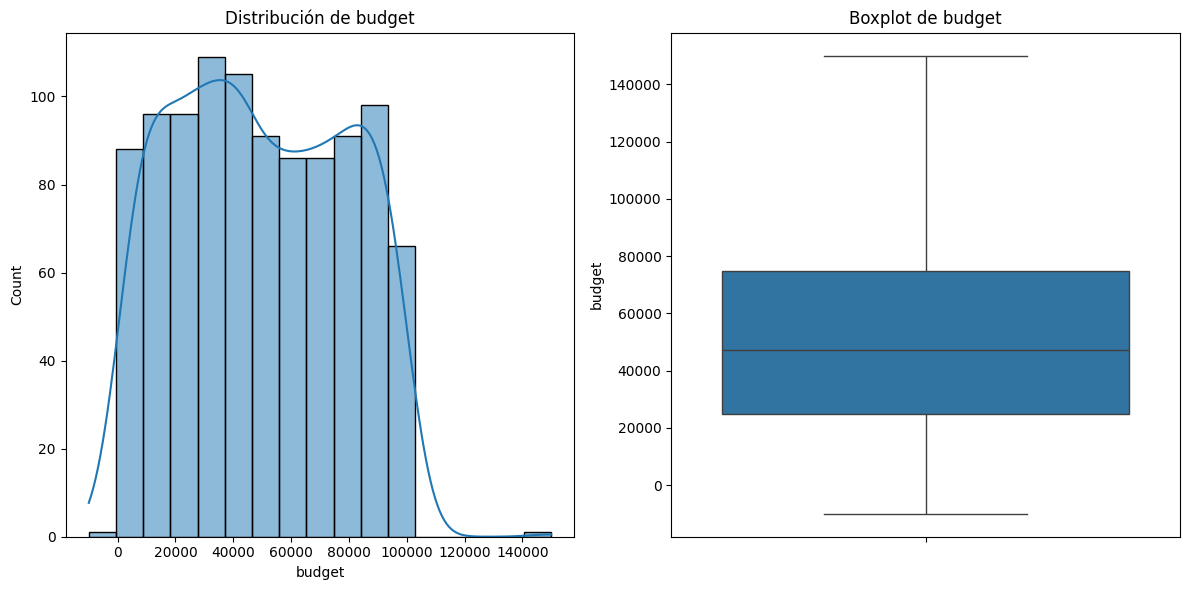


Impacto del tratamiento de outliers en 'budget':
Estrategia aplicada: cap
Registros antes: 1014, después: 1014
Media antes: 49455.29, después: 49455.29
Desviación estándar antes: 29081.48, después: 29081.48
Mín antes: -10000.00, después: -10000.00
Máx antes: 150002.43, después: 150002.43

Análisis de outliers para 'revenue'
Método: IQR (multiplicador=1.5)
Número de outliers detectados: 0
Porcentaje de outliers: 0.00%
Rango aceptable: -485025.08 - 1523040.94


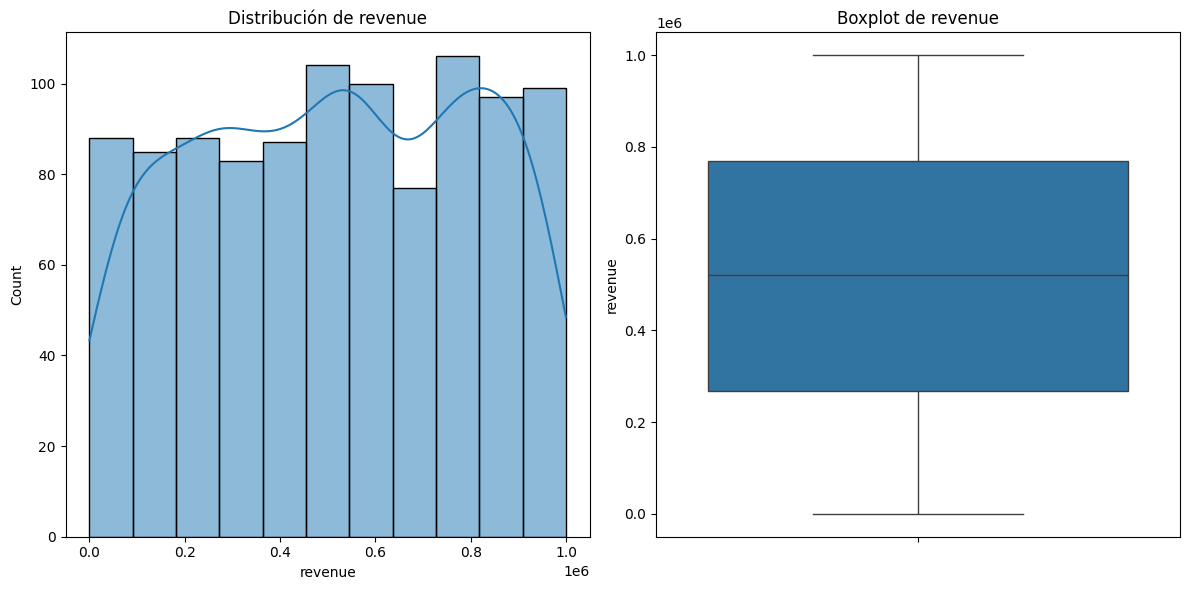


Impacto del tratamiento de outliers en 'revenue':
Estrategia aplicada: log
Registros antes: 1014, después: 1014
Media antes: 512590.40, después: 12.83
Desviación estándar antes: 288360.60, después: 1.14
Mín antes: 0.00, después: 0.00
Máx antes: 999712.49, después: 13.82

Resumen final después del tratamiento de outliers:
              budget      revenue
count    1014.000000  1014.000000
mean    49455.291556    12.829908
std     29081.477051     1.140999
min    -10000.000000     0.000000
25%     24811.427500    12.498744
50%     47197.385000    13.161044
75%     74887.827500    13.554168
max    150002.427500    13.815224


In [874]:
def detect_outliers_iqr(df, column, multiplier=1.5):
    # Verificar si la columna existe
    if column not in df.columns:
        raise ValueError(f"La columna '{column}' no existe en el DataFrame")
    
    # Ignorar valores NaN
    valid_data = df[df[column].notna()]
    
    if len(valid_data) == 0:
        return pd.DataFrame(), np.nan, np.nan
    
    Q1 = valid_data[column].quantile(0.25)
    Q3 = valid_data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound


def detect_outliers_zscore(df, column, threshold=3):
    # Verificar si la columna existe
    if column not in df.columns:
        raise ValueError(f"La columna '{column}' no existe en el DataFrame")
    
    # Ignorar valores NaN para el cálculo del z-score
    valid_data = df[df[column].notna()]
    
    if len(valid_data) == 0:
        return pd.DataFrame()
    
    # Calcular z-scores solo en datos válidos
    column_data = valid_data[column].values
    z_scores = zscore(column_data, nan_policy='omit')
    
    # Crear una serie con los z-scores
    z_series = pd.Series(np.nan, index=df.index)
    z_series.loc[valid_data.index] = z_scores
    
    # Identificar outliers
    outliers = df[(abs(z_series) > threshold)]
    
    return outliers


def visualize_outliers(df, column, outliers):
    plt.figure(figsize=(12, 6))
    
    # Distribución de datos
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    
    # Boxplot con outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar detalles de los outliers
    if not outliers.empty:
        print(f"\nDetalle de los outliers de {column}:")
        # Ordenar los outliers para facilitar su análisis
        sorted_outliers = outliers.sort_values(by=column)
        
        # Mostrar estadísticas descriptivas de los outliers
        print(f"\nEstadísticas de los outliers de {column}:")
        print(sorted_outliers[column].describe())


def handle_outliers(df, column, lower_bound=None, upper_bound=None, strategy='cap', log_transform=False,
                  custom_value=None, quantile_transform=False):
    # Crear una copia del DataFrame para no modificar el original
    df_result = df.copy()
    
    # Verificar si la columna existe
    if column not in df_result.columns:
        raise ValueError(f"La columna '{column}' no existe en el DataFrame")
    
    # Guardar el estado inicial para informar cambios
    initial_stats = {
        'count': len(df_result),
        'mean': df_result[column].mean(),
        'std': df_result[column].std(),
        'min': df_result[column].min(),
        'max': df_result[column].max()
    }
    
    # Aplicar la estrategia seleccionada
    if strategy == 'remove':
        if lower_bound is not None and upper_bound is not None:
            df_result = df_result[(df_result[column] >= lower_bound) & 
                                  (df_result[column] <= upper_bound)]
        else:
            raise ValueError("Se necesitan los límites para eliminar los outliers")
            
    elif strategy == 'cap':
        if lower_bound is not None:
            df_result[column] = df_result[column].clip(lower=lower_bound)
        if upper_bound is not None:
            df_result[column] = df_result[column].clip(upper=upper_bound)
            
    elif strategy == 'custom' and custom_value is not None:
        if lower_bound is not None:
            df_result.loc[df_result[column] < lower_bound, column] = custom_value
        if upper_bound is not None:
            df_result.loc[df_result[column] > upper_bound, column] = custom_value
            
    elif strategy == 'log' or log_transform:
        # Asegurarse de que todos los valores son positivos
        min_val = df_result[column].min()
        if min_val <= 0:
            offset = abs(min_val) + 1  # Añadir 1 para evitar log(0)
            df_result[column] = df_result[column] + offset
            
        # Aplicar transformación logarítmica
        df_result[column + '_original'] = df_result[column]  # Guardar valores originales
        df_result[column] = np.log(df_result[column])
        
    elif strategy == 'quantile' or quantile_transform:
        from sklearn.preprocessing import QuantileTransformer
        
        # Guardar valores originales
        df_result[column + '_original'] = df_result[column]
        
        # Aplicar transformación de cuantiles (más robusta a outliers)
        transformer = QuantileTransformer(output_distribution='normal')
        data = df_result[column].values.reshape(-1, 1)
        df_result[column] = transformer.fit_transform(data)
    
    # Calcular estadísticas después del tratamiento
    final_stats = {
        'count': len(df_result),
        'mean': df_result[column].mean(),
        'std': df_result[column].std(),
        'min': df_result[column].min(),
        'max': df_result[column].max()
    }
    
    # Mostrar el impacto del tratamiento
    print(f"\nImpacto del tratamiento de outliers en '{column}':")
    print(f"Estrategia aplicada: {strategy}")
    print(f"Registros antes: {initial_stats['count']}, después: {final_stats['count']}")
    print(f"Media antes: {initial_stats['mean']:.2f}, después: {final_stats['mean']:.2f}")
    print(f"Desviación estándar antes: {initial_stats['std']:.2f}, después: {final_stats['std']:.2f}")
    print(f"Mín antes: {initial_stats['min']:.2f}, después: {final_stats['min']:.2f}")
    print(f"Máx antes: {initial_stats['max']:.2f}, después: {final_stats['max']:.2f}")
    
    return df_result


def analyze_and_handle_outliers(df, columns, method='iqr', threshold=3, multiplier=1.5, 
                              strategies=None):
    if strategies is None:
        strategies = {col: 'cap' for col in columns}
    
    df_result = df.copy()
    results = {}
    
    for column in columns:
        print(f"\n{'=' * 50}")
        print(f"Análisis de outliers para '{column}'")
        print(f"{'=' * 50}")
        
        if method == 'iqr':
            outliers, lower_bound, upper_bound = detect_outliers_iqr(df_result, column, multiplier)
            print(f"Método: IQR (multiplicador={multiplier})")
        else:  # zscore
            outliers = detect_outliers_zscore(df_result, column, threshold)
            lower_bound, upper_bound = None, None
            print(f"Método: Z-score (threshold={threshold})")
            
            # Para z-score, calcular también los límites equivalentes
            mean = df_result[column].mean()
            std = df_result[column].std()
            lower_bound = mean - threshold * std
            upper_bound = mean + threshold * std
        
        print(f"Número de outliers detectados: {len(outliers)}")
        print(f"Porcentaje de outliers: {len(outliers) / len(df_result) * 100:.2f}%")
        print(f"Rango aceptable: {lower_bound:.2f} - {upper_bound:.2f}")
        
        # Visualizar los outliers
        visualize_outliers(df_result, column, outliers)
        
        # Aplicar la estrategia seleccionada
        strategy = strategies.get(column, 'cap')
        df_result = handle_outliers(df_result, column, lower_bound, upper_bound, strategy)
        
        # Guardar resultados
        results[column] = {
            'outliers': outliers,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'strategy': strategy
        }
    
    return df_result, results


if __name__ == "__main__":
    # Análisis y manejo de outliers para 'budget' y 'revenue'
    columns_to_analyze = ['budget', 'revenue']
    
    # Definir estrategias personalizadas para cada columna
    strategies = {
        'budget': 'cap',       # Limitar valores extremos
        'revenue': 'log'       # Transformación logarítmica
    }
    
    # Análisis completo
    df_processed, results = analyze_and_handle_outliers(
        df, 
        columns_to_analyze,
        method='iqr',          # Método de detección ('iqr' o 'zscore')
        multiplier=1.5,        # Para IQR
        threshold=3,           # Para Z-score
        strategies=strategies  # Estrategias de manejo
    )
    
    # Mostrar resumen final
    print("\nResumen final después del tratamiento de outliers:")
    print(df_processed[columns_to_analyze].describe())
    
    # Guardar resultados si es necesario
    # df_processed.to_csv('datos_sin_outliers.csv', index=False)

In [875]:
# --- Función para corregir errores ortográficos ---
def correct_spelling(column, valid_values):
    corrected_column = column.apply(
        lambda x: get_close_matches(x, valid_values, n=1, cutoff=0.8)[0] if x in valid_values else x
    )
    return corrected_column

# --- Valores válidos para cada columna categórica ---
valid_channels = ['email', 'social media', 'podcast', 'webinar', 'event', 'organic', 'paid', 'referral', 'promotion']
valid_target_audiences = ['B2B', 'B2C']
valid_types = ['email', 'social media', 'webinar', 'podcast', 'event', 'promotion', 'organic', 'paid', 'referral']

# --- Corrección de errores en 'channel' ---
df['channel'] = correct_spelling(df['channel'], valid_channels)

# --- Corrección de errores en 'target_audience' ---
df['target_audience'] = correct_spelling(df['target_audience'], valid_target_audiences)

# --- Corrección de errores en 'type' ---
df['type'] = correct_spelling(df['type'], valid_types)

# --- Verificación de consistencia ---
print("\nVerificando consistencia después de las correcciones:")
print("Valores únicos en 'channel':", df['channel'].unique())
print("Valores únicos en 'target_audience':", df['target_audience'].unique())
print("Valores únicos en 'type':", df['type'].unique())


Verificando consistencia después de las correcciones:
Valores únicos en 'channel': ['organic' 'promotion' 'paid' 'referral']
Valores únicos en 'target_audience': ['B2B' 'B2C' 'Not available']
Valores únicos en 'type': ['email' 'podcast' 'webinar' 'social media' 'event']


Creación de un Data Frame con los datos limpios

In [876]:
df_limpio = df.copy()

In [877]:
print(df_limpio.columns)  # Verifica si 'budget' está en las columnas
print(df_limpio['budget'].isnull().sum())  # Verifica si hay valores nulos
print(df_limpio['budget'].dtype)  # Verifica el tipo de datos

Index(['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type',
       'target_audience', 'channel', 'conversion_rate', 'revenue',
       'campaign_duration'],
      dtype='object')
0
float64


In [878]:
total_budget = df_limpio['budget'].sum()
print(f"Total Budget: {total_budget:,.2f}")

Total Budget: 50,147,665.64


In [879]:
total_revenue = df_limpio['revenue'].sum()
print(f"Total Revenue: {total_revenue:,.2f}")

Total Revenue: 519,766,669.20


In [880]:
total_profit = total_revenue - total_budget
print(f"Total Profit: {total_profit:,.2f}")

Total Profit: 469,619,003.56


Añadimos la columna 'net_profit' para saber el balance de cada campaña

In [881]:
df_limpio['net_profit'] = df_limpio['revenue'] - df_limpio['budget']

In [882]:
df_limpio.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration,net_profit
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,328,701511.18
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,432,498896.12
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,295,373584.32
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,366,75368.98
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,313,8219.45


Añadir componentes de fecha

In [883]:
# Añadir componentes de fecha para start_date
df_limpio['start_month'] = df_limpio['start_date'].dt.month
df_limpio['start_month_name'] = df_limpio['start_date'].dt.month_name()
df_limpio['start_quarter'] = df_limpio['start_date'].dt.quarter
df_limpio['start_year'] = df_limpio['start_date'].dt.year

# Añadir componentes de fecha para end_date
df_limpio['end_month'] = df_limpio['end_date'].dt.month
df_limpio['end_month_name'] = df_limpio['end_date'].dt.month_name()
df_limpio['end_quarter'] = df_limpio['end_date'].dt.quarter
df_limpio['end_year'] = df_limpio['end_date'].dt.year

# Añadir día de la semana y trimestre para análisis estacional
df_limpio['start_day_of_week'] = df_limpio['start_date'].dt.day_name()
df_limpio['campaign_quarter'] = df_limpio['start_quarter'].astype(str) + 'Q' + df_limpio['start_year'].astype(str)

In [884]:
# Convertir columnas a numérico
cols_to_convert = ['revenue', 'roi', 'budget', 'conversion_rate']
for col in cols_to_convert:
    df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')

# --- Revenue Category --- 
revenue_conditions = [
    (df_limpio['revenue'] <= 400000),
    (df_limpio['revenue'] > 400000) & (df_limpio['revenue'] <= 650000), # Corregido para no superponerse
    (df_limpio['revenue'] > 650000)
]
revenue_choices = [
    'low revenue',
    'medium revenue',
    'high revenue'
]
df_limpio['revenue_category'] = np.select(revenue_conditions, revenue_choices, default='unknown')

# --- ROI Category --- 
roi_conditions = [
    (df_limpio['roi'] < 0.2),
    (df_limpio['roi'] >= 0.2) & (df_limpio['roi'] < 0.4),
    (df_limpio['roi'] >= 0.4) & (df_limpio['roi'] < 0.6),
    (df_limpio['roi'] >= 0.6) & (df_limpio['roi'] < 0.8),
    (df_limpio['roi'] >= 0.8)
]
roi_labels = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
df_limpio['roi_performance'] = np.select(roi_conditions, roi_labels, default='Desconocido')

# --- Budget Category --- 
budget_conditions = [
    (df_limpio['budget'] <= 30000),
    (df_limpio['budget'] > 30000) & (df_limpio['budget'] <= 50000), # Corregido para no superponerse
    (df_limpio['budget'] > 50000)
]
budget_choices = [
    'low budget',
    'medium budget',
    'high budget'
]
df_limpio['budget_category'] = np.select(budget_conditions, budget_choices, default='unknown')

# --- conversion_rate --- 
conversion_conditions = [
    (df_limpio['conversion_rate'] < 0.3),
    (df_limpio['conversion_rate'] >= 0.3) & (df_limpio['conversion_rate'] < 0.6),
    (df_limpio['conversion_rate'] >= 0.6) & (df_limpio['conversion_rate'] < 0.9),
    (df_limpio['conversion_rate'] >= 0.9)
]
conversion_labels = ['Baja', 'Media', 'Alta', 'Muy alta']
df_limpio['conversion_performance'] = np.select(conversion_conditions, conversion_labels, default='Desconocido')


In [885]:
# Verificar la distribución de las categorías
print("Distribución de revenue_category:")
print(df_limpio['revenue_category'].value_counts())
print("\nDistribución de roi_category:")
print(df_limpio['roi_performance'].value_counts())
print("\nDistribución de budget_category:")
print(df_limpio['budget_category'].value_counts())
print("\nDistribución de conversion_rate_category:")
print(df_limpio['conversion_performance'].value_counts())

Distribución de revenue_category:
revenue_category
low revenue       387
high revenue      370
medium revenue    257
Name: count, dtype: int64

Distribución de roi_category:
roi_performance
Bajo        226
Alto        226
Medio       223
Muy alto    217
Muy bajo    122
Name: count, dtype: int64

Distribución de budget_category:
budget_category
high budget      484
low budget       317
medium budget    213
Name: count, dtype: int64

Distribución de conversion_rate_category:
conversion_performance
Alta        346
Media       311
Baja        242
Muy alta    115
Name: count, dtype: int64


Creación de Variables Derivadas

In [886]:
# Margen de beneficio
df_limpio['profit_margin'] = df_limpio['net_profit'] / df_limpio['revenue']

In [887]:
# Eficiencia de la campaña (revenue por día)
df_limpio['revenue_per_day'] = df_limpio['revenue'] / df_limpio['campaign_duration']

Variables binarias

In [888]:
# Flag para campañas rentables (ROI positivo)
df_limpio['is_profitable'] = np.where(df_limpio['roi'] > 0, 1, 0)

In [889]:
# Flag para campañas con alto rendimiento (ROI > 0.5)
df_limpio['is_high_performing'] = np.where(df_limpio['roi'] > 0.5, 1, 0)

In [890]:
# Flag para campañas estacionales (temporadas específicas)
holiday_months = [11, 12, 1] # Meses de temporada navideña y año nuevo
df_limpio['is_holiday_campaign'] = np.where(df_limpio['start_month'].isin(holiday_months), 1, 0)

In [891]:
# Flag para campañas cortas vs largas (usando la mediana como punto de corte)
median_duration = df_limpio['campaign_duration'].median()
df_limpio['is_long_campaign'] = np.where(df_limpio['campaign_duration'] > median_duration, 1, 0)


In [892]:
# Flag para campañas digitales vs tradicionales
digital_channels = ['email', 'social media', 'webinar', 'podcast', 'organic', 'paid']
df_limpio['is_digital'] = np.where(df_limpio['channel'].isin(digital_channels), 1, 0)

In [893]:
# Mostrar las primeras filas de las nuevas variables
print("\nPrimeras filas del DataFrame con las nuevas variables:")
nuevas_columnas = [
    'start_month', 'start_quarter', 'campaign_quarter', 
    'roi_performance', 'conversion_performance',
    'cost_per_conversion', 'profit_margin',
    'is_profitable', 'is_high_performing', 'is_holiday_campaign'
]
# Filtrar solo las columnas que existen en el DataFrame
nuevas_columnas_existentes = [col for col in nuevas_columnas if col in df_limpio.columns]

# Mostrar las primeras filas de las columnas existentes
print(df_limpio[nuevas_columnas_existentes].head())


Primeras filas del DataFrame con las nuevas variables:
   start_month  start_quarter campaign_quarter roi_performance  \
0            4              2           2Q2023            Bajo   
1            2              1           1Q2023            Alto   
2           12              4           4Q2022            Bajo   
3            9              3           3Q2022           Medio   
4            7              3           3Q2023            Bajo   

  conversion_performance  profit_margin  is_profitable  is_high_performing  \
0                  Media       0.988610              1                   0   
1                   Alta       0.965713              1                   1   
2                   Baja       0.815281              1                   0   
3                   Baja       0.837817              1                   0   
4                   Alta       0.173000              1                   0   

   is_holiday_campaign  
0                    0  
1                    0  
2  

In [894]:
df_limpio['cost_per_conversion'] = np.where(
    df_limpio['conversion_rate'] > 0,
    df_limpio['budget'] / (df_limpio['conversion_rate'] * 100),
    0
)

# Profit margin - evitando división por cero
df_limpio['profit_margin'] = np.where(
    df_limpio['revenue'] > 0,
    df_limpio['net_profit'] / df_limpio['revenue'],
    0  # Valor por defecto cuando revenue es 0
)

# Revenue per day - evitando división por cero
df_limpio['revenue_per_day'] = np.where(
    df_limpio['campaign_duration'] > 0,
    df_limpio['revenue'] / df_limpio['campaign_duration'],
    0  # Valor por defecto cuando campaign_duration es 0
)

print("\nAfter adding missing variables:")
print(df_limpio[['profit_margin', 'revenue_per_day', 'cost_per_conversion']].describe())


After adding missing variables:
       profit_margin  revenue_per_day  cost_per_conversion
count    1014.000000      1014.000000          1014.000000
mean        0.124033      2018.827364          1271.783665
std        18.018851      3802.290957          1336.569844
min      -571.757601         0.000000         -1000.000000
25%         0.814044       732.600200           420.953348
50%         0.904000      1396.042458           869.612920
75%         0.952671      2200.642328          1547.251250
max         1.000000     81467.228000          7709.058000


In [895]:
# Convertir fechas a formato corto (Y-M-D)
df_limpio['start_date'] = df_limpio['start_date'].dt.date
df_limpio['end_date'] = df_limpio['end_date'].dt.date

Resumen

In [896]:
df_limpio[['budget', 'conversion_rate', 'roi', 'revenue']].describe()

,budget,conversion_rate,roi,revenue
count,1014.000000,1014.000000,1014.000000,1014.00000
mean,49455.291556,0.541667,0.538905,512590.40355
std,29081.477051,0.269195,0.280355,288360.59836
min,-10000.000000,0.000000,-0.200000,0.00000
25%,24811.427500,0.300000,0.310000,267999.68000
50%,47197.385000,0.550000,0.535000,519718.34500
75%,74887.827500,0.770000,0.770000,770016.18500
max,150002.427500,1.500000,3.000000,999712.49000


In [897]:
df_limpio.describe(include='all')

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,...,budget_category,conversion_performance,profit_margin,revenue_per_day,is_profitable,is_high_performing,is_holiday_campaign,is_long_campaign,is_digital,cost_per_conversion
count,1014,1014,1014,1014.000000,1014.000000,1014,1014,1014,1014.000000,1014.00000,...,1014,1014,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
unique,1013,346,347,NaN,NaN,5,3,4,NaN,NaN,...,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Reverse-engineered static infrastructure,2023-07-07,2023-10-09,NaN,NaN,email,B2B,promotion,NaN,NaN,...,high budget,Alta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,8,9,NaN,NaN,284,520,275,NaN,NaN,...,484,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,49455.291556,0.538905,NaN,NaN,NaN,0.541667,512590.40355,...,NaN,NaN,0.124033,2018.827364,0.992110,0.530572,0.251479,0.496055,0.479290,1271.783665
std,NaN,NaN,NaN,29081.477051,0.280355,NaN,NaN,NaN,0.269195,288360.59836,...,NaN,NaN,18.018851,3802.290957,0.088516,0.499311,0.434078,0.500231,0.499817,1336.569844
min,NaN,NaN,NaN,-10000.000000,-0.200000,NaN,NaN,NaN,0.000000,0.00000,...,NaN,NaN,-571.757601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1000.000000
25%,NaN,NaN,NaN,24811.427500,0.310000,NaN,NaN,NaN,0.300000,267999.68000,...,NaN,NaN,0.814044,732.600200,1.000000,0.000000,0.000000,0.000000,0.000000,420.953348
50%,NaN,NaN,NaN,47197.385000,0.535000,NaN,NaN,NaN,0.550000,519718.34500,...,NaN,NaN,0.904000,1396.042458,1.000000,1.000000,0.000000,0.000000,0.000000,869.612920
75%,NaN,NaN,NaN,74887.827500,0.770000,NaN,NaN,NaN,0.770000,770016.18500,...,NaN,NaN,0.952671,2200.642328,1.000000,1.000000,1.000000,1.000000,1.000000,1547.251250


In [898]:
print(df_limpio.dtypes)

campaign_name              object
start_date                 object
end_date                   object
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
campaign_duration           int64
net_profit                float64
start_month                 int32
start_month_name           object
start_quarter               int32
start_year                  int32
end_month                   int32
end_month_name             object
end_quarter                 int32
end_year                    int32
start_day_of_week          object
campaign_quarter           object
revenue_category           object
roi_performance            object
budget_category            object
conversion_performance     object
profit_margin             float64
revenue_per_day           float64
is_profitable               int64
is_high_perfor

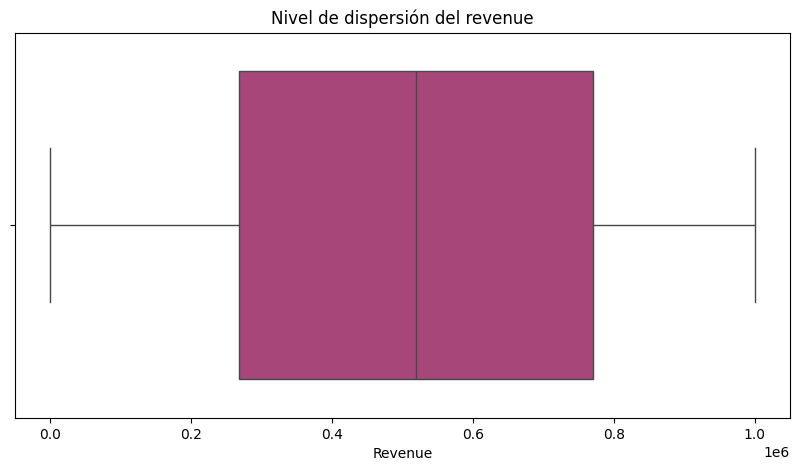

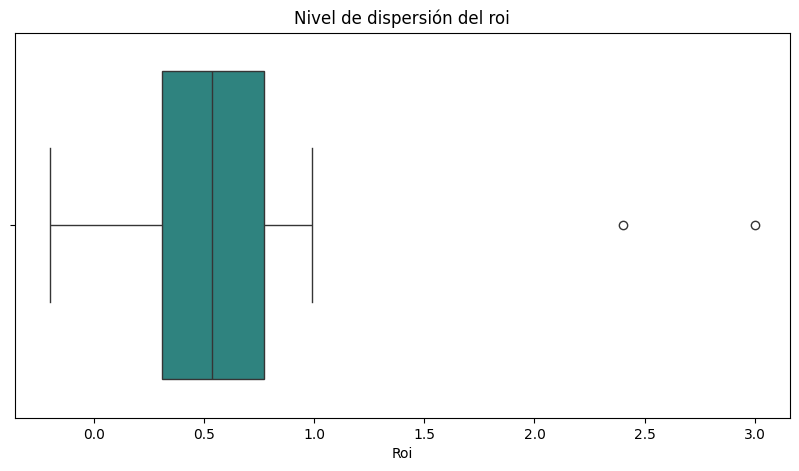

In [899]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpio['revenue'], palette='magma')
plt.title('Nivel de dispersión del revenue', fontsize=12)
plt.xlabel('Revenue')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpio['roi'], palette='viridis')
plt.title('Nivel de dispersión del roi', fontsize=12)
plt.xlabel('Roi')
plt.show()

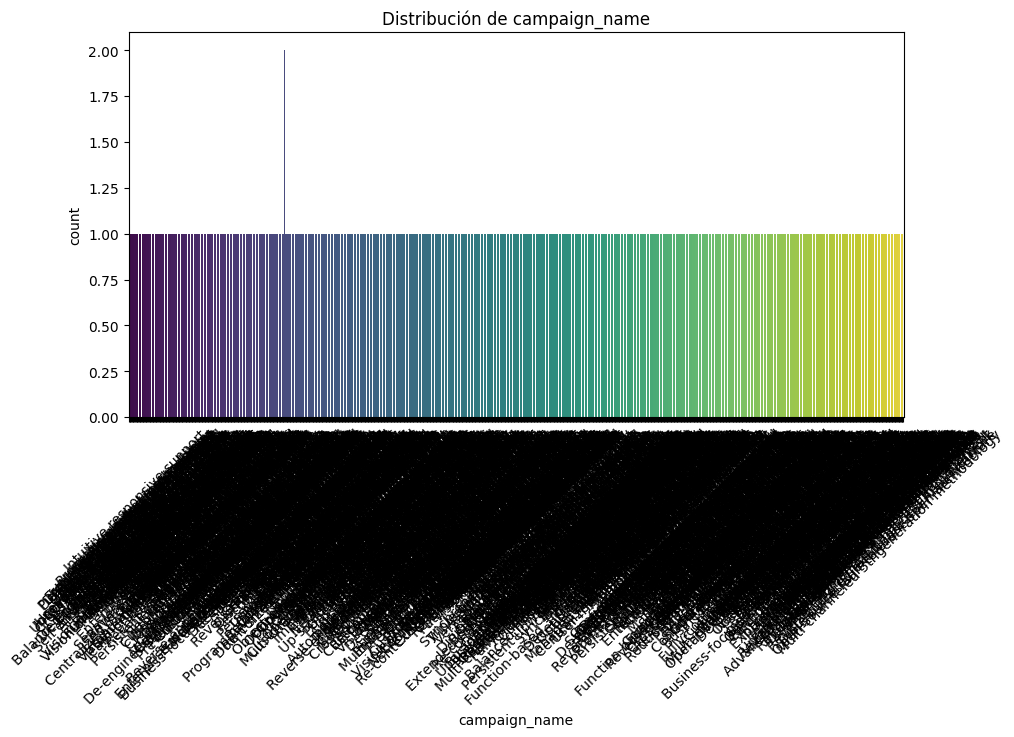

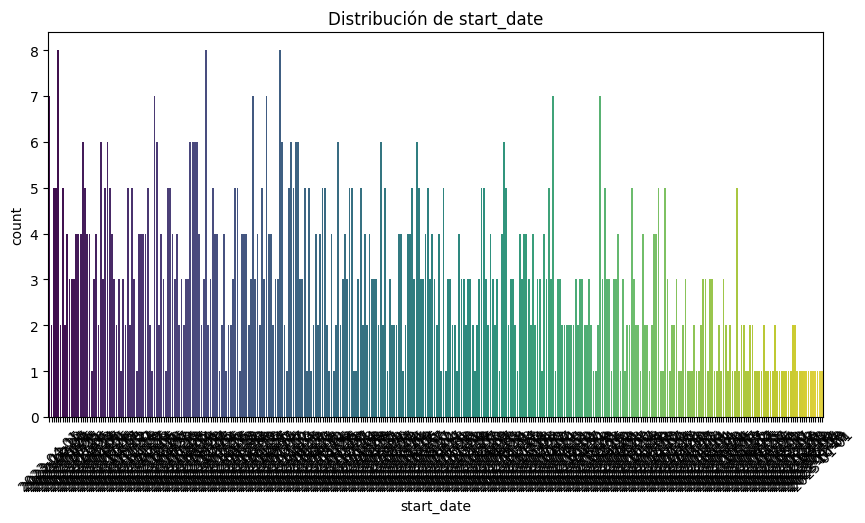

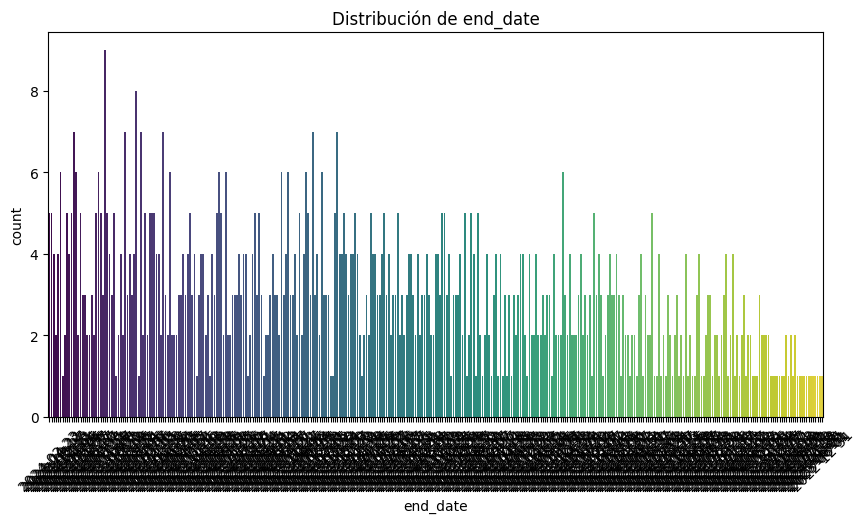

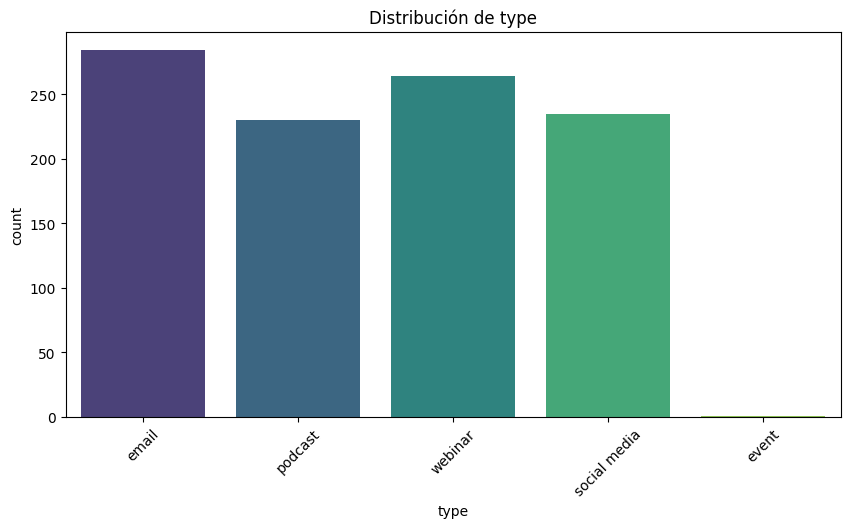

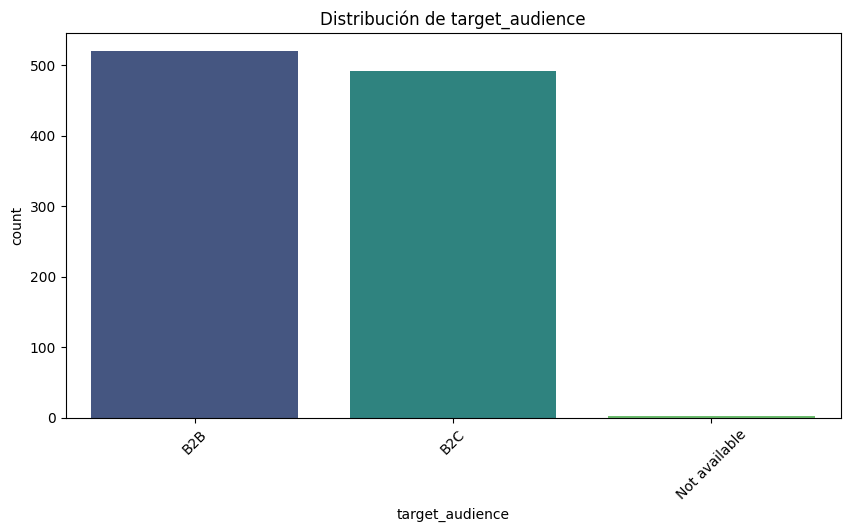

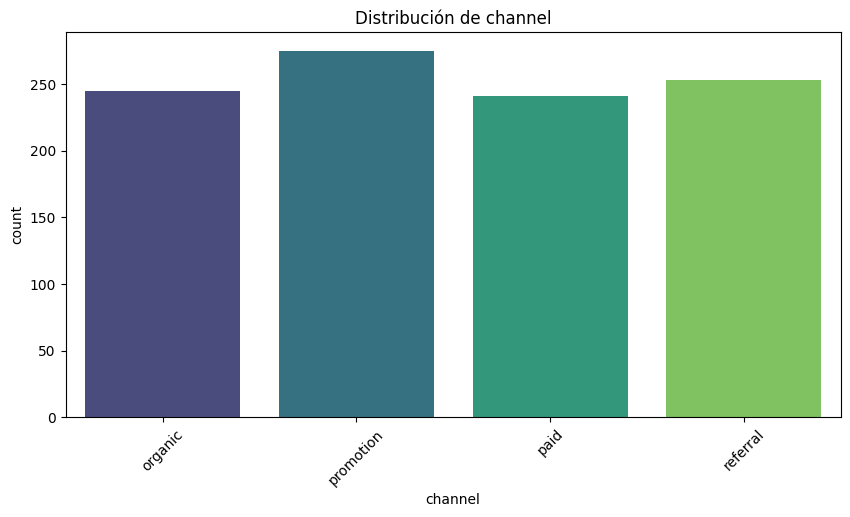

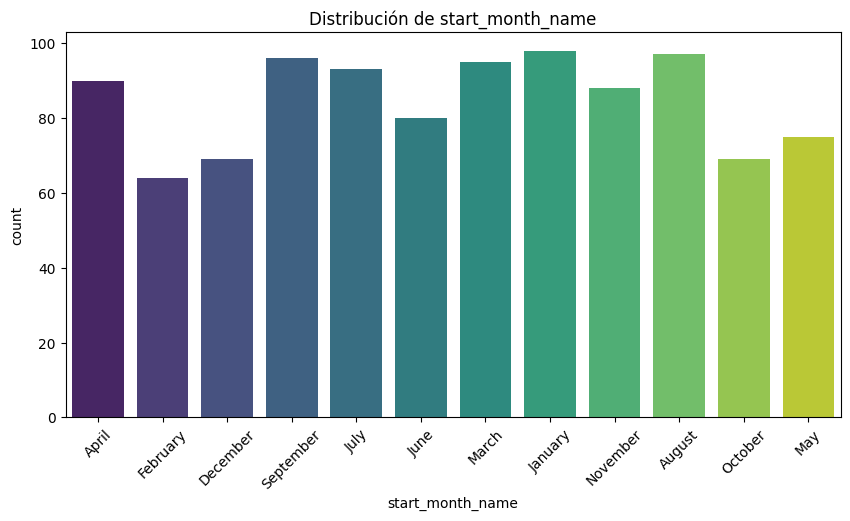

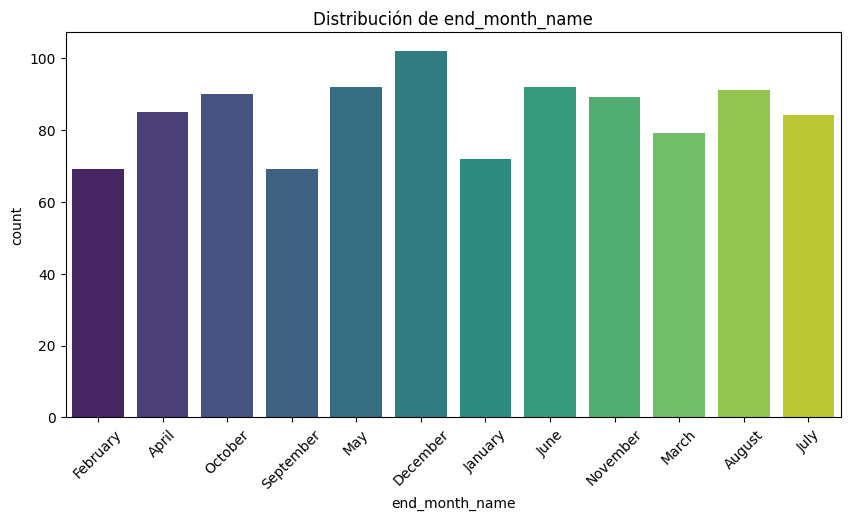

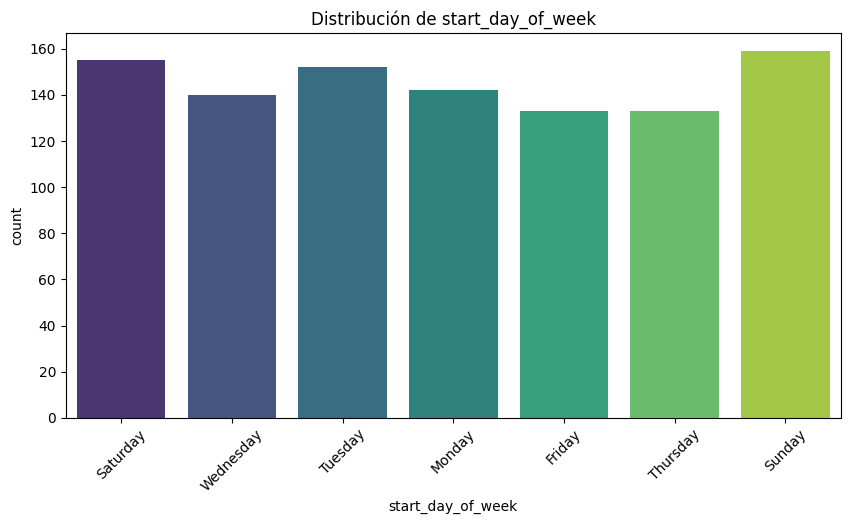

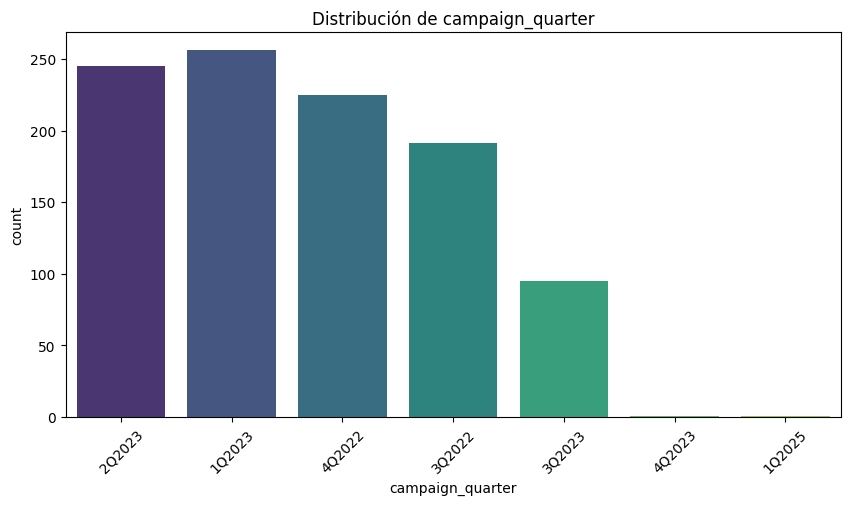

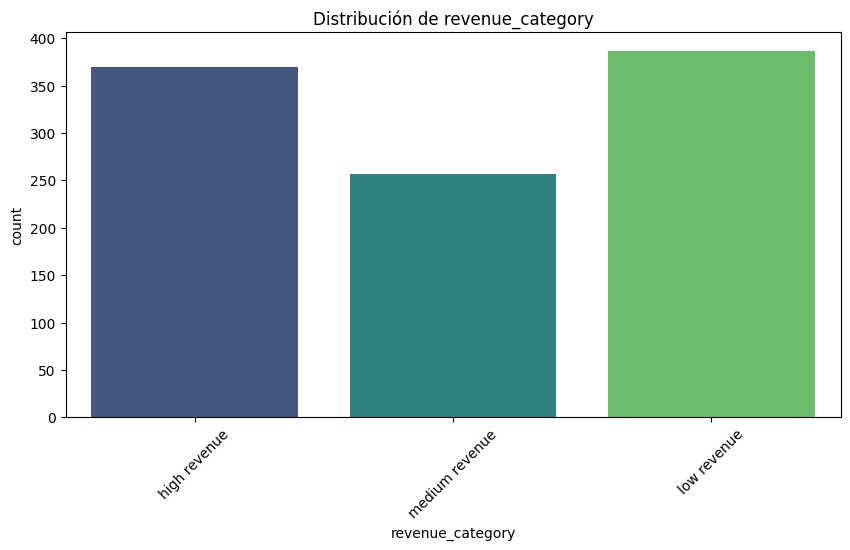

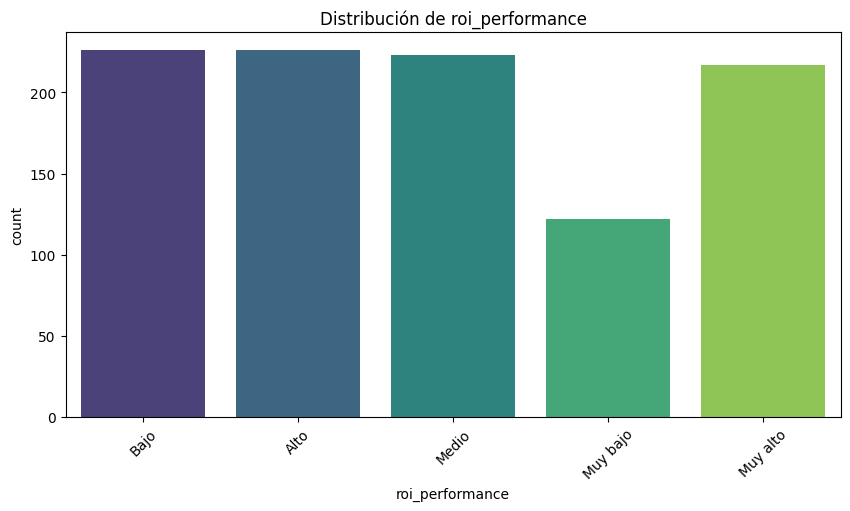

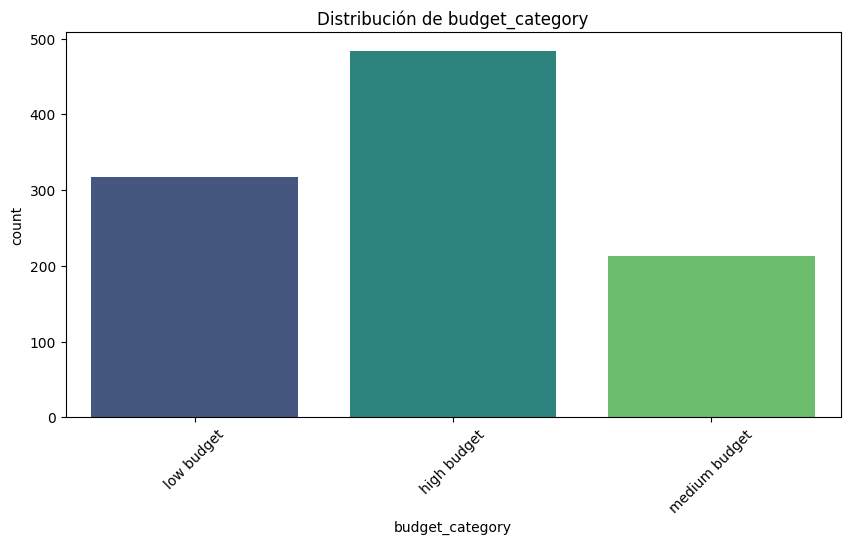

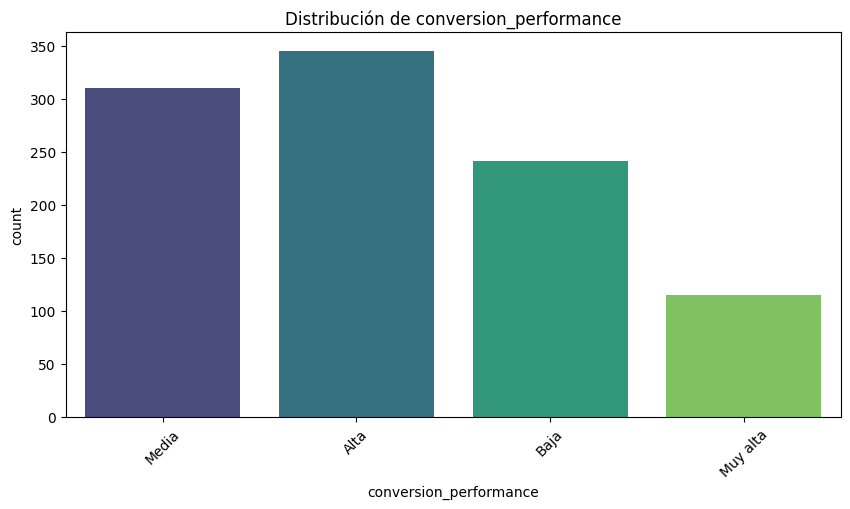

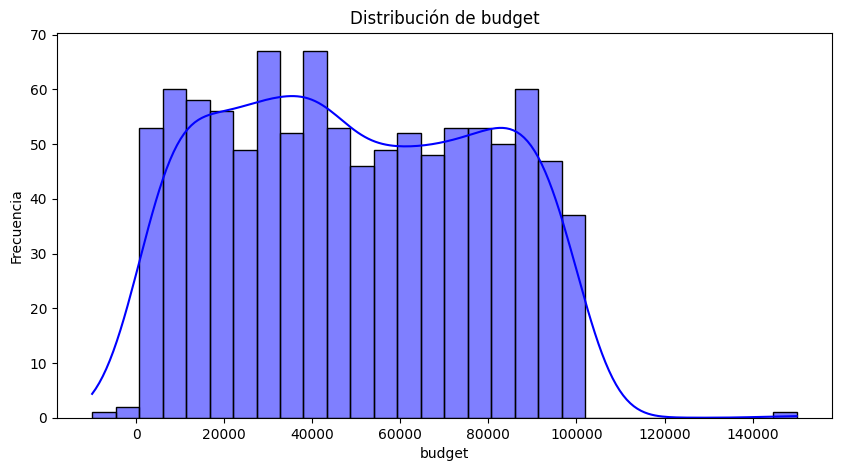

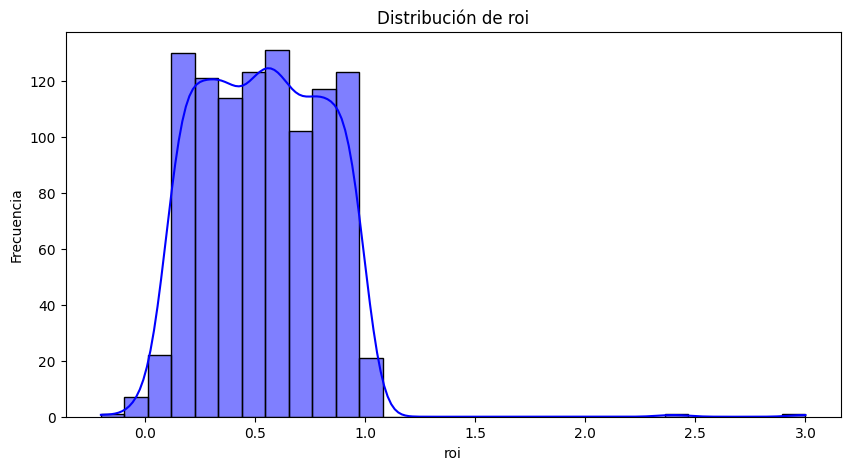

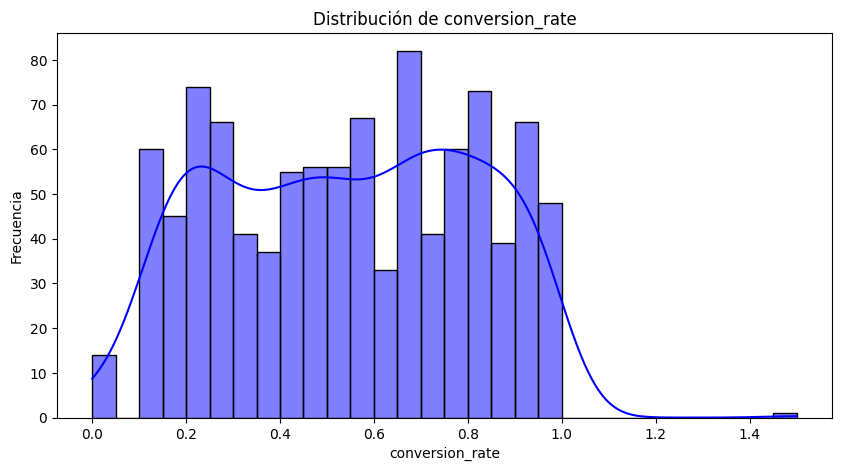

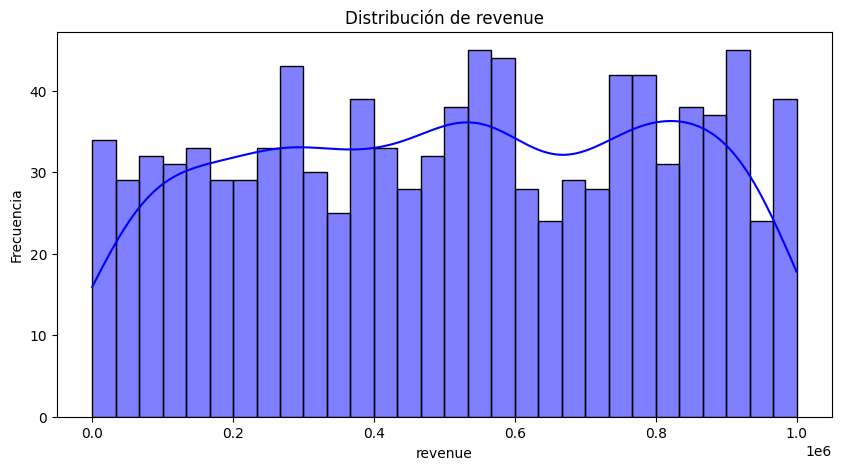

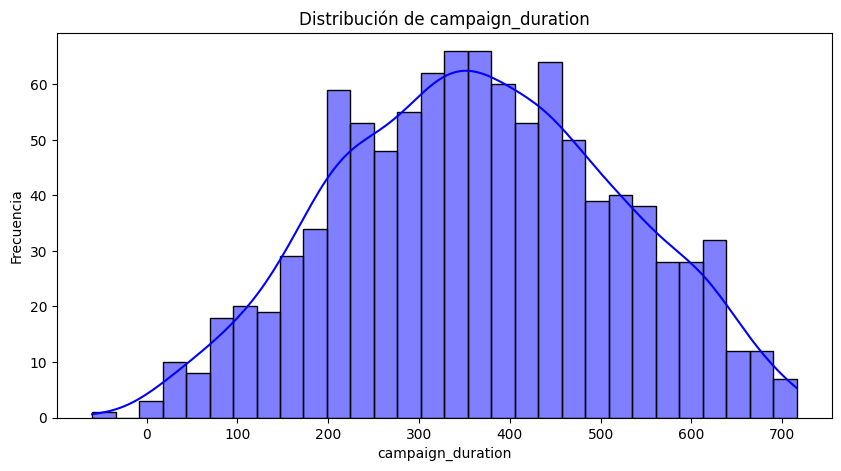

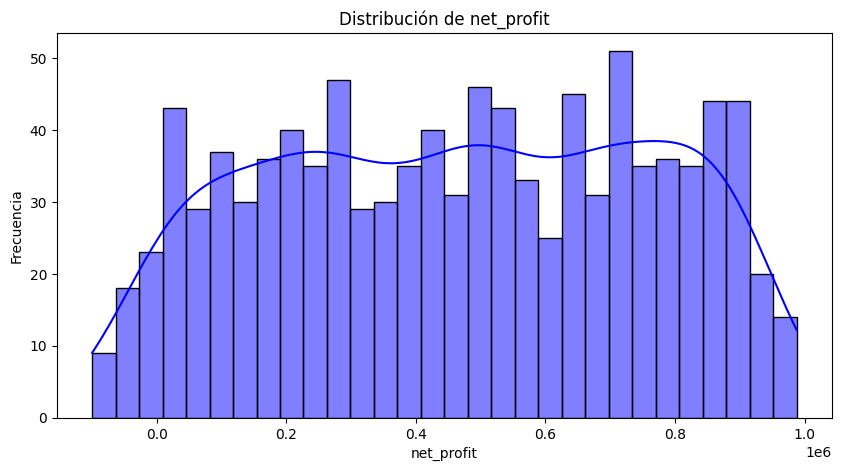

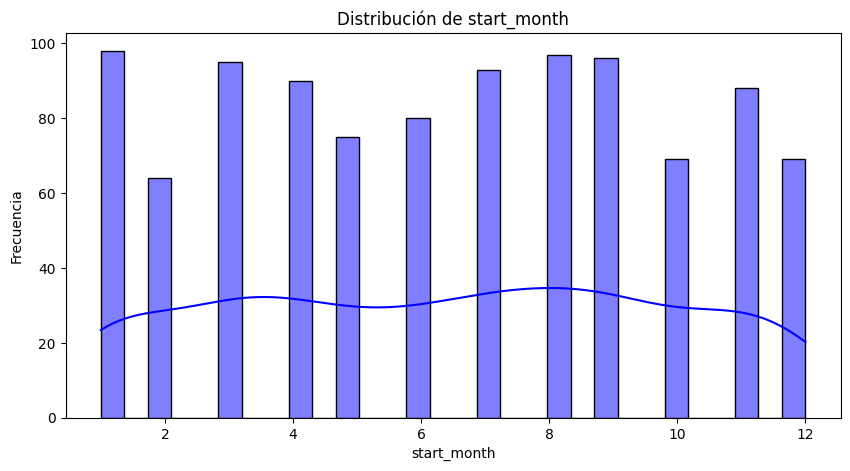

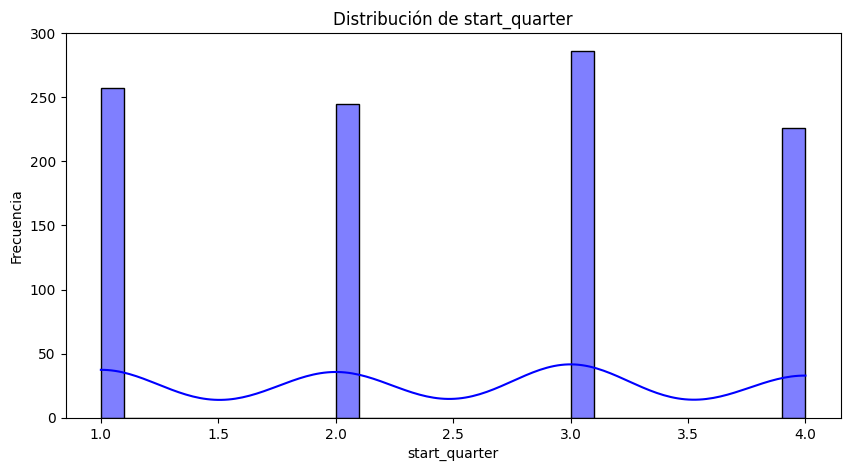

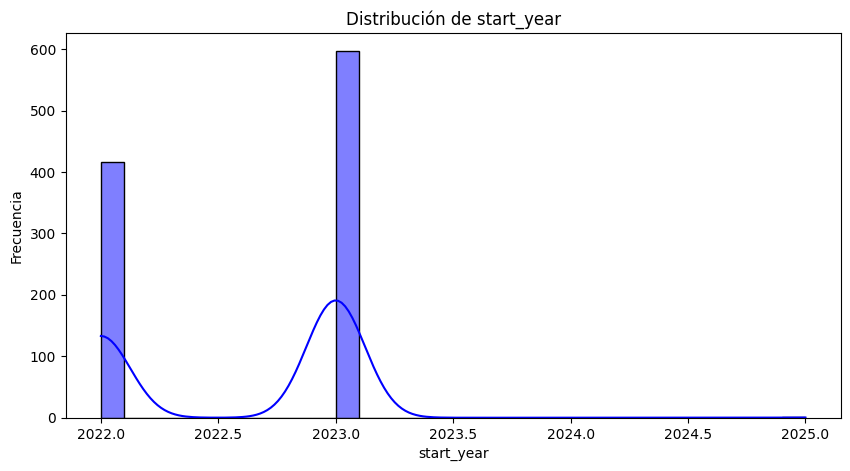

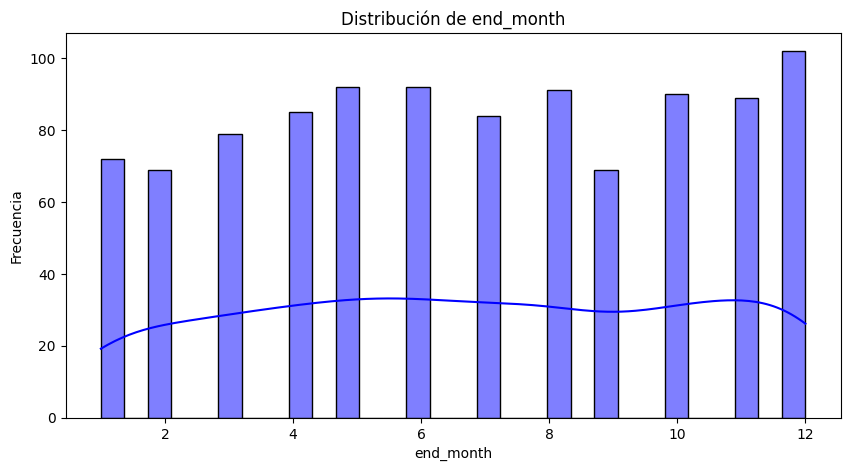

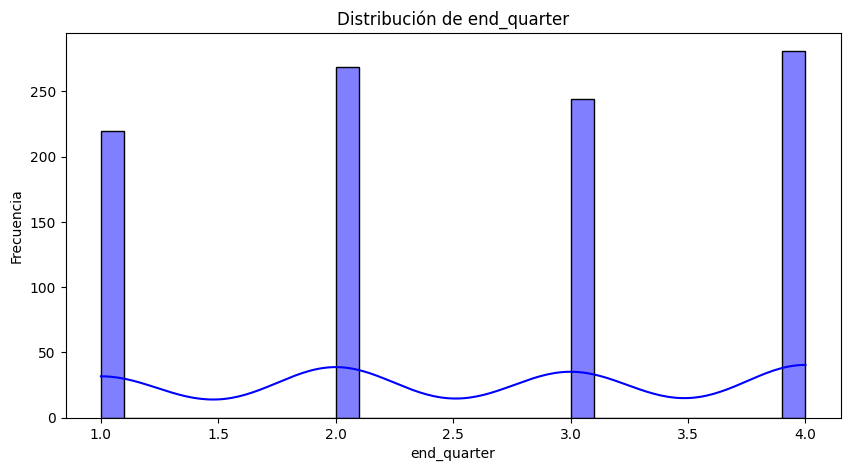

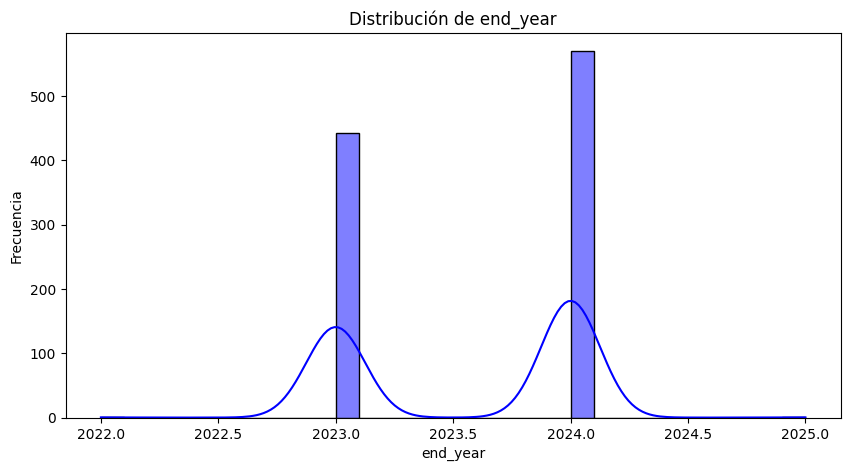

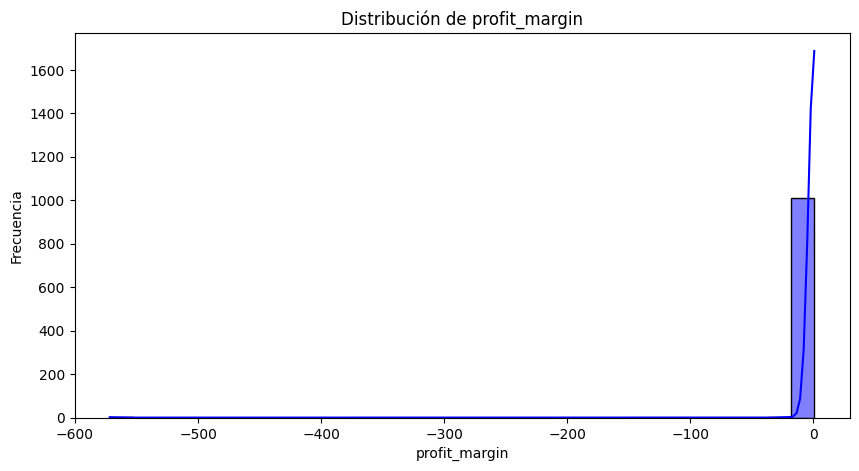

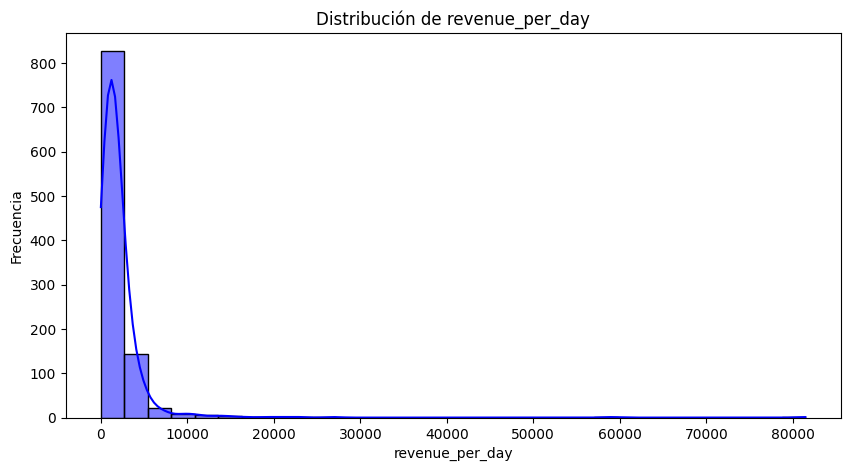

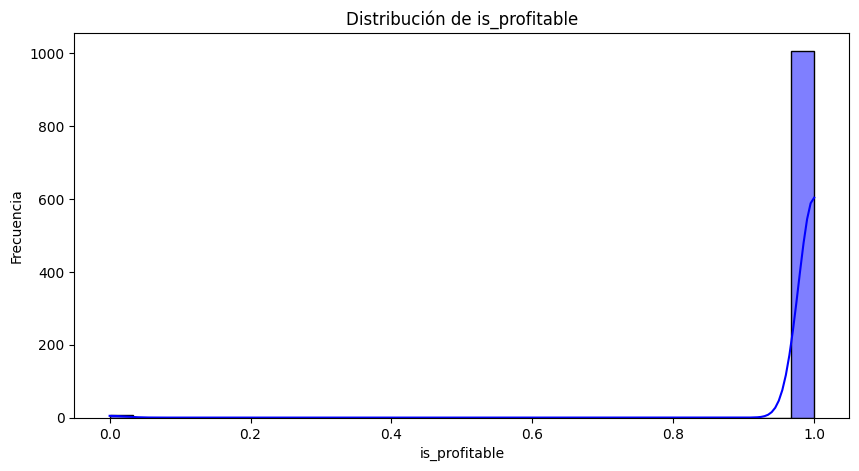

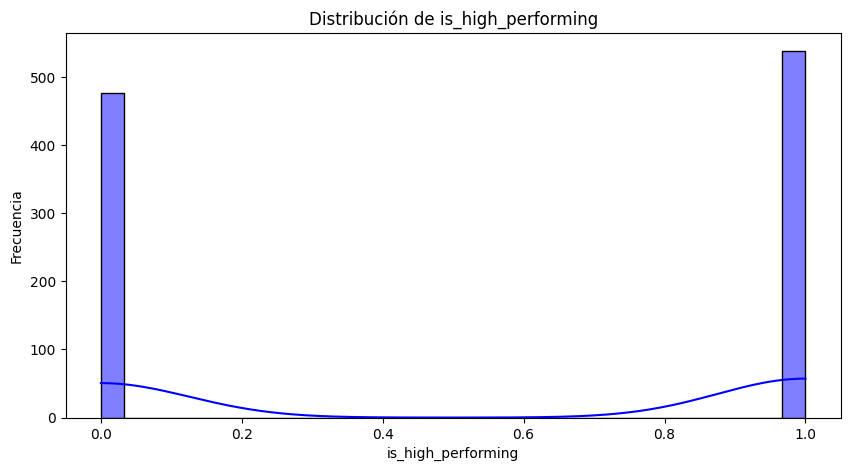

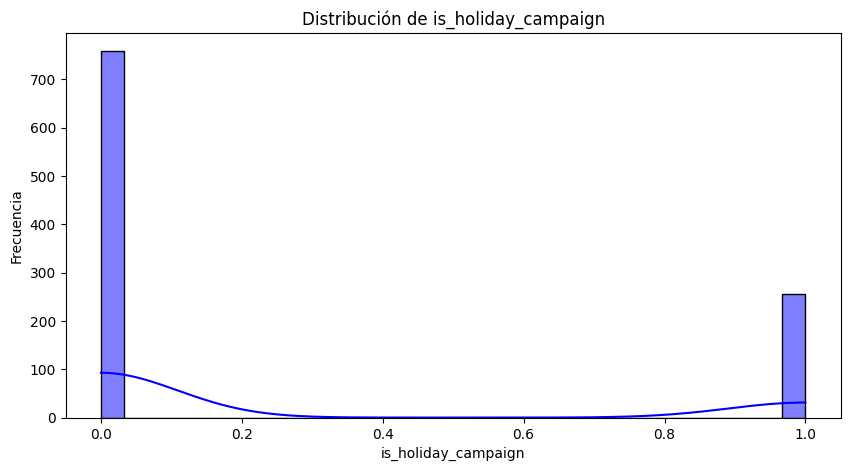

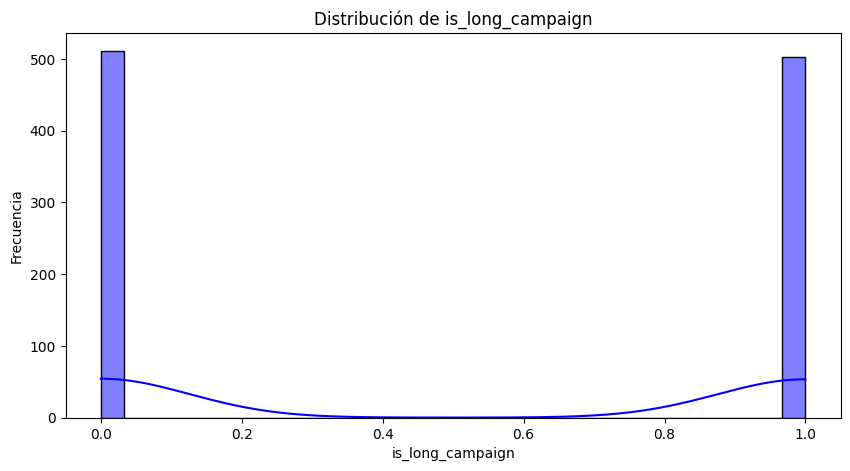

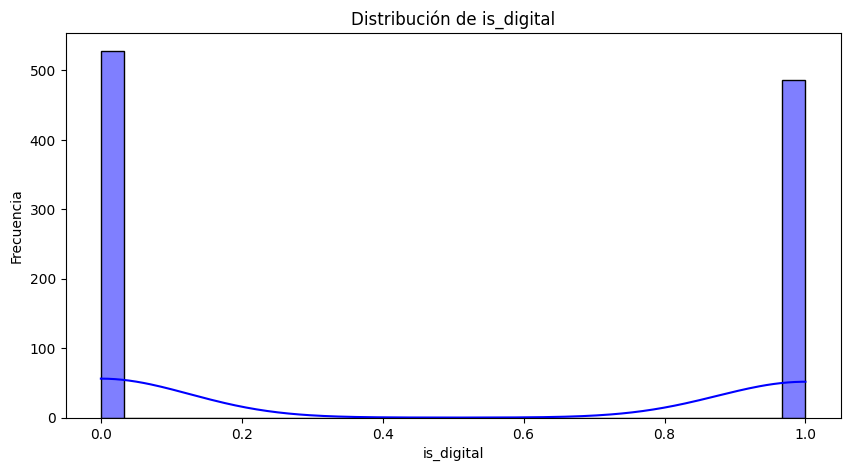

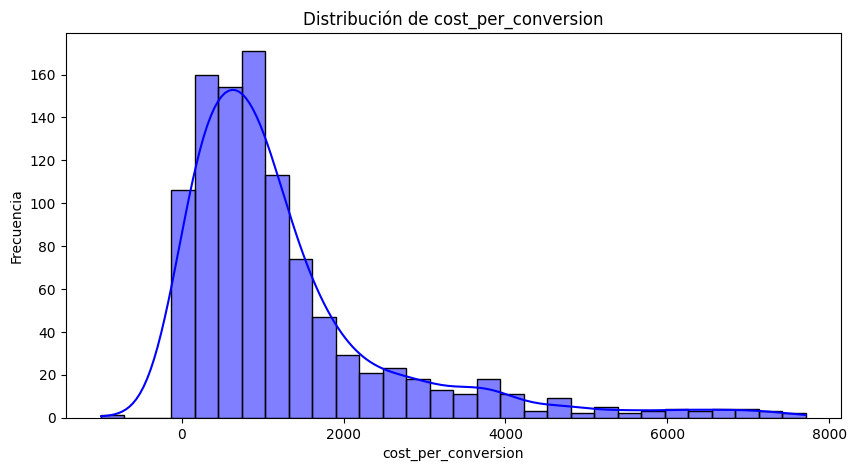

In [900]:
def plot_categorical_distribution(df_limpio, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_limpio, x=col, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_numerical_distribution(df_limpio, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_limpio, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


categorical_cols = df_limpio.select_dtypes(include=['object']).columns
numerical_cols = df_limpio.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    plot_categorical_distribution(df_limpio, col)
for col in numerical_cols:
    plot_numerical_distribution(df_limpio, col)

In [901]:
def save_dataframe(df_limpio, filename, folder_path=None, index=False):
        # Asegurar que el nombre del archivo tenga extensión .csv
        if not filename.endswith('.csv'):
            filename += '.csv'
            
        # Si no se especifica carpeta, usar el directorio actual
        if folder_path is None:
            full_path = filename
        else:
            # Crear la carpeta si no existe
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)
                print(f"Se creó la carpeta: {folder_path}")
                
            # Construir la ruta completa
            full_path = os.path.join(folder_path, filename)
            
        # Guardar el DataFrame
        df_limpio.to_csv(full_path, index=index)
        print(f"DataFrame guardado exitosamente en: {full_path}")
        
        return full_path
    
output_folder = r"C:\Users\Victor\Documents\GitHub\marketing\data"  
save_dataframe(df_limpio, "marketingcampaigns_clean.csv", output_folder)

DataFrame guardado exitosamente en: C:\Users\Victor\Documents\GitHub\marketing\data\marketingcampaigns_clean.csv


'C:\\Users\\Victor\\Documents\\GitHub\\marketing\\data\\marketingcampaigns_clean.csv'